In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/dataset',)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 364 files belonging to 2 classes.


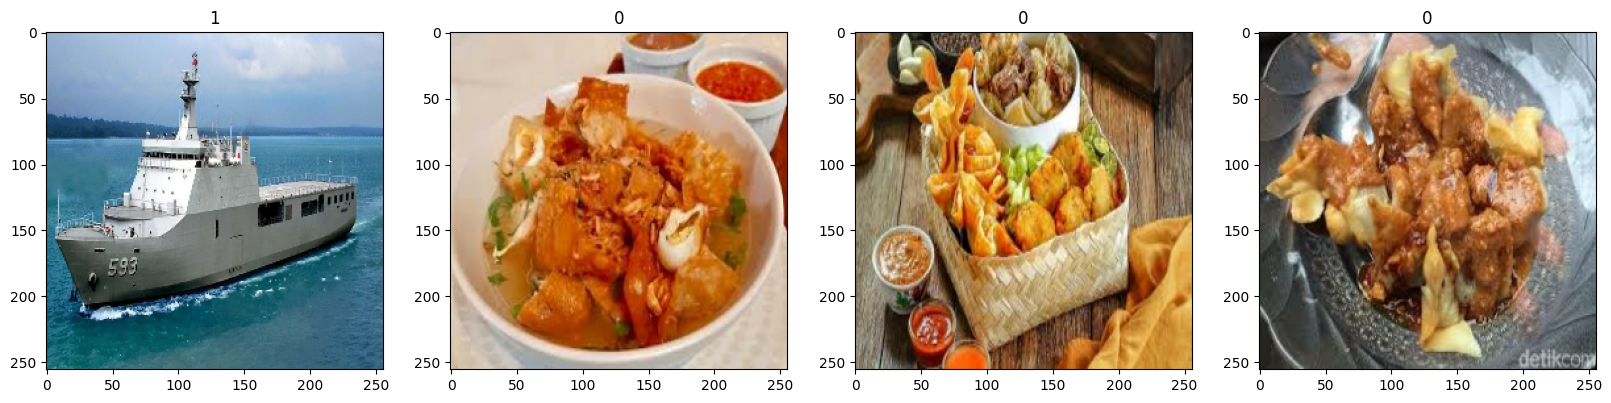

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
data = data.map(lambda x,y: (x/255, y))

In [7]:
data.as_numpy_iterator().next()

(array([[[[0.9684819 , 0.9920113 , 0.9841682 ],
          [0.9647059 , 0.9882353 , 0.98039216],
          [0.9647059 , 0.9882353 , 0.98039216],
          ...,
          [0.9397212 , 0.9543964 , 0.9811198 ],
          [0.94814646, 0.9494562 , 0.98039216],
          [0.9490196 , 0.9490196 , 0.98039216]],
 
         [[0.9708094 , 0.9943388 , 0.9864957 ],
          [0.96919423, 0.99272364, 0.9848805 ],
          [0.96877784, 0.99230725, 0.9844641 ],
          ...,
          [0.93298864, 0.9476639 , 0.9743872 ],
          [0.94141394, 0.94272363, 0.97365963],
          [0.9422871 , 0.9422871 , 0.97365963]],
 
         [[0.9748009 , 0.99720436, 0.99048716],
          [0.9746755 , 0.99720436, 0.99036175],
          [0.9731562 , 0.9966856 , 0.9888425 ],
          ...,
          [0.92478764, 0.9390451 , 0.9635166 ],
          [0.93300396, 0.9353143 , 0.96299785],
          [0.93387717, 0.93500304, 0.96299785]],
 
         ...,
 
         [[0.9221306 , 0.93391544, 0.953274  ],
          [0.93702

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size

8

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [12]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [13]:
logdir='logs'

In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [15]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 17s 431ms/step - loss: 0.5670 - accuracy: 0.7734 - val_loss: 0.4051 - val_accuracy: 0.8438
Epoch 2/20
8/8 [==============================] - 4s 376ms/step - loss: 0.3927 - accuracy: 0.8672 - val_loss: 0.4006 - val_accuracy: 0.8281
Epoch 3/20
8/8 [==============================] - 7s 813ms/step - loss: 0.3406 - accuracy: 0.8828 - val_loss: 0.2302 - val_accuracy: 0.9062
Epoch 4/20
8/8 [==============================] - 4s 375ms/step - loss: 0.2724 - accuracy: 0.8867 - val_loss: 0.1743 - val_accuracy: 0.9219
Epoch 5/20
8/8 [==============================] - 6s 518ms/step - loss: 0.2718 - accuracy: 0.8984 - val_loss: 0.3090 - val_accuracy: 0.8750
Epoch 6/20
8/8 [==============================] - 4s 376ms/step - loss: 0.2533 - accuracy: 0.9219 - val_loss: 0.2014 - val_accuracy: 0.9375
Epoch 7/20
8/8 [==============================] - 5s 451ms/step - loss: 0.2057 - accuracy: 0.9297 - val_loss: 0.0813 - val_accuracy: 0.9688
Epoch 8/20
8/8 [===

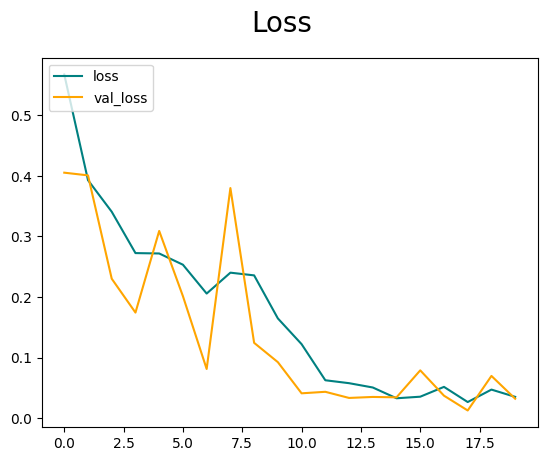

In [16]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

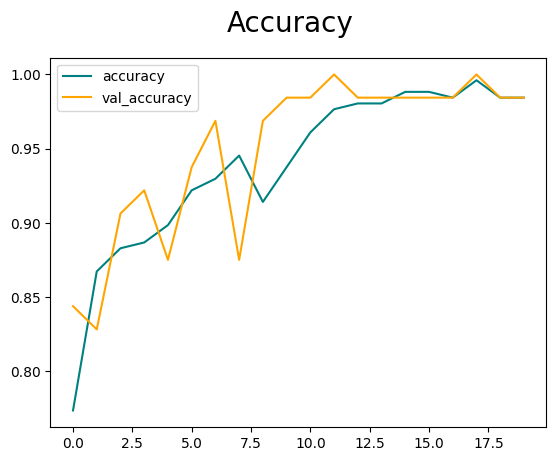

In [17]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [19]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 144ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [20]:
import cv2

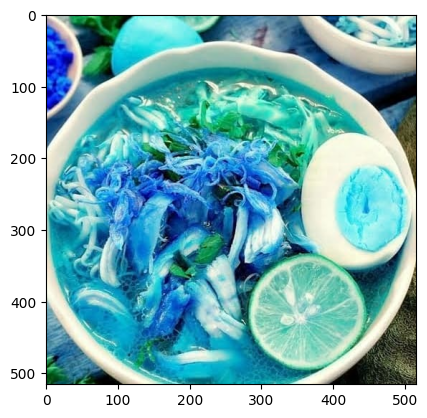

In [22]:
img = cv2.imread('/content/drive/MyDrive/dataset/non-batagor/nasi-soto.jpg')
plt.imshow(img)
plt.show()

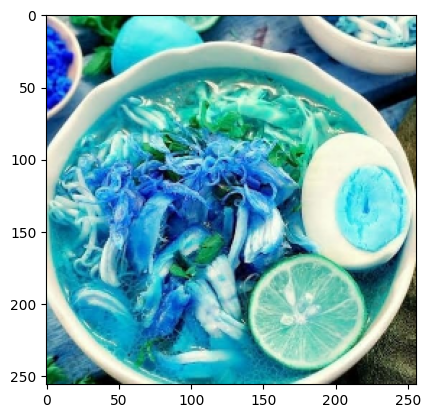

In [23]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [24]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 177ms/step


array([[0.9986009]], dtype=float32)

In [25]:
from tensorflow.keras.models import load_model

In [26]:
output_model_path = '/content/drive/MyDrive/detector-model.h5'
model.save(output_model_path)
print("Model saved to:", output_model_path)

Model saved to: /content/drive/MyDrive/detector-model.h5
